# PBH neutrino spectrum rate

Plot the primary and secondary neutrino spectrum rate

OSError: BlackHawkData/1.0e+15/instantaneous_primary_spectra.txt not found.

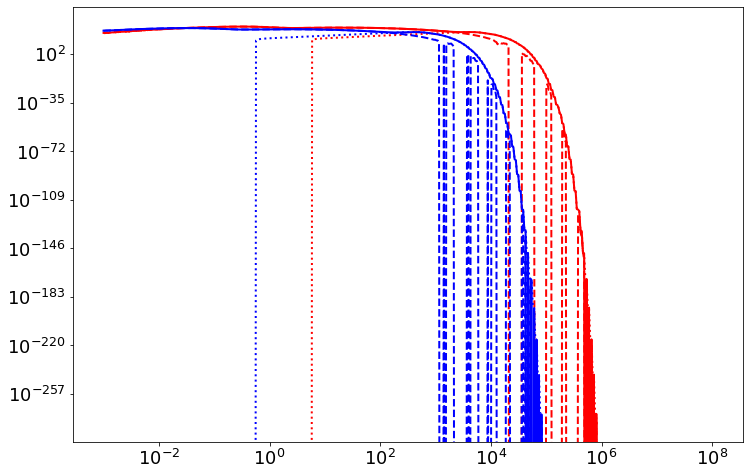

In [1]:
from Source.constants import *

# PBH masses
Mpbhs = [1.e13, 1.e14, 1.e15]
cols = ["r", "b", "g", "m", "y"]

# 1 for plotting only nu_e, 0 for the sum of the three flavours
only_nue = 1

for mm, Mpbh in enumerate(Mpbhs):

    # Data folder
    data_folder = "{:.1e}".format(Mpbh)
    folder = "BlackHawkData/" + data_folder + "/"

    data_primary = np.genfromtxt(folder+"instantaneous_primary_spectra.txt",skip_header = 2)
    data_secondary = np.genfromtxt(folder+"instantaneous_secondary_spectra.txt",skip_header = 2)

    if only_nue:
        # Plot only electron neutrino
        tot_sec = data_secondary[:,3]
        tot_prim = data_primary[:,6]/3.
    else:
        # Plot sum of three neutrinos
        tot_sec = 0.
        # Sum over three neutrino species
        for i in [3,4,5]:   
            tot_sec += data_secondary[:,i]
        tot_prim = data_primary[:,6]


    Esec = data_secondary[:,0]*1.e3 # in MeV
    Eprim = data_primary[:,0]*1.e3
    intsec = interp1d(Esec, tot_sec/1.e3, fill_value="extrapolate")     # in MeV
    intprim = interp1d(Eprim, tot_prim/1.e3,fill_value="extrapolate")     # in MeV

    plt.loglog(Esec,intprim(Esec),linestyle=":",linewidth = 2, color=cols[mm])
    plt.loglog(Esec,intsec(Esec)-intprim(Esec), linestyle="--",linewidth = 2, color=cols[mm])
    plt.loglog(Esec,intsec(Esec), linestyle="-",linewidth = 2, color=cols[mm])

# Figure legend
customlegend = []
for n, Mpbh in enumerate(Mpbhs):
    customlegend.append( Line2D([0], [0], color=cols[n], lw=4, label = r"$M_{\rm PBH}=$"+scinot(Mpbh)+" g"))

customlegend.append( Line2D([0], [0], color="black", linestyle=":", label="Primary"))
customlegend.append( Line2D([0], [0], color="black", linestyle="--", label="Secondary"))
customlegend.append( Line2D([0], [0], color="black", linestyle="-", label="Total"))

plt.ylim(1.e16,1.e23)
plt.xlim(1.e0,1.e5)
plt.xlabel('$E{\\rm \,\, [MeV]}$')
plt.ylabel(r'$\frac{dN}{dE dt} \,\, [{\rm MeV}^{-1}{\rm s}^{-1}]$')
plt.tick_params(axis='both', which='both', top=True, right=True, direction="in")
plt.grid()
plt.legend(handles=customlegend)
plt.savefig("figures/neutrino_spectra_blackhawk.png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
from Source.flux_stuff import *

#Mpbhs = np.logspace(np.log10(5.e14), np.log10(8.e15), 15)[:3]
#Mpbhs = np.logspace(np.log10(5.e14), np.log10(1.e15), 5)
Mpbhs = 1.e14*np.linspace(5., 10., 6)

compute_flux(Mpbhs, True)
plt.ylim(1e13, 1e25)
plt.legend()